In [1]:
import rasterio as rio
from rasterio.plot import show

Pixel Y, X coords: 6774, 3086
Window(col_off=1336, row_off=5024, width=3500, height=3500)


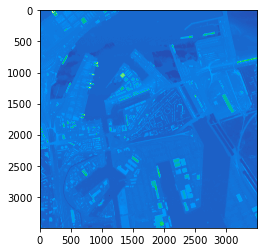

In [14]:
infile = "./DHMVIIDSMRAS1m_k05.tif"
coordinates = (69086.94, 225225.97) , # lon, lat of ~centre of Zeebrugge
    
# Your NxN window
N = 3500

# Open the raster
with rio.open(infile) as dataset:

    # Loop through your list of coords
    lon, lat = coordinates

    # Get pixel coordinates from map coordinates
    py, px = dataset.index(lon, lat)
    print('Pixel Y, X coords: {}, {}'.format(py, px))

    # Build an NxN window
    window = rio.windows.Window(px - N//2, py - N//2, N, N)
    print(window)

    # Read the data in the window
    # clip is a nbands * N * N numpy array
    clip = dataset.read(window=window)
    show(clip, cmap='terrain')
    